# Finite target yield curve
### (Reaction yield vs beam energy for a narrow resonance)




#### <u>**Reaction yield definition** </u>
$$
Y = \frac{number~of~reactions}{number~of~incident~beam~particles} = \frac{N_R}{N_B}.
$$

Reaction cross-section:
$$
\sigma = \frac{N_R/t}{N_T \times N_B/(t \times A)},\\
$$
where, $N_R, N_B, N_T$ are number of reactions, beam, and target nuclei respectively, *t* is time, and *A* is the beam area.

Combining the above 2 equations gives,
$$
Y = \sigma \times (N_T/A).
$$

#### <u>**Thick target yield** </u>

The reaction yield for a thin slice (of thickness $\Delta x$) of target:
$$
\Delta Y = \sigma \times N_t \times \Delta x,\\
$$
where, $N_t$ is number of target atoms per unit area.

Reaction yield for the full target thickness for incident beam energy $E_0$:
$$
Y(E_0) = \int \sigma(x) N(x) dx = \int \sigma(x) N(x) dx \frac{dE(x)}{dx} \frac{dx}{dE(x)} = \int_{E_0-\Delta E}^{E_0} \frac{\sigma(E)}{\epsilon(E)} dE,
$$
where, $\Delta E$ is the total energy loss in the full target thickness,\
and $\epsilon(E)$ is the stopping power in $eV/(at/cm^2)$:
$$
\epsilon(E)=\frac{1}{N} \frac{dE}{dx}.
$$

Using Breit-Wigner equation for resonant cross-section:
$$
\sigma_{BW}(E) = \frac{\lambda^2}{4\pi} \frac{(2J+1)(1+\delta_{01})}{(2J_0+1)(2J_1+1)} \frac{\Gamma_a\Gamma_b}{(E_r-E)^2+\Gamma^2/4},
$$
where,\
$J_0, J_1, \& ~J$ are the target, projectile, and resonance spins,\
$\Gamma_a, \Gamma_b, \& ~\Gamma$ are the entrace channel, exit channel, and the resonoance widths,\
$\lambda$ and $E_r$ are de Broglie wavelength and the resonance energy respectively.

The Breit-Wigner equation can be written in terms of <u>**resonance strength, $\omega \gamma$**</u>, as:
$$
\sigma_{BW}(E) = \frac{\lambda^2}{4\pi} \omega \gamma \frac{1}{(E_r-E)^2+\Gamma^2/4},
$$
where, $\omega = [(2J+1)(1+\delta_{01})]/[(2J_0+1)(2J_1+1)]$,\
and $\gamma = \Gamma_a \Gamma_b / \Gamma$.

Substituting, BW equation for $\sigma(E)$ in the yield equation:
$$
Y(E_0) = \frac{1}{\epsilon_r} \frac{\lambda_r^2}{2\pi} \omega \gamma \frac{\Gamma}{2} \int_{E_0-\Delta E}^{E_0} \frac{dE}{(E_r-E)^2+ \Gamma^2/4} = \frac{1}{\epsilon_r} \frac{\lambda_r^2}{2\pi} \omega \gamma \Bigg[ atan \Bigg( \frac{E_0 - E_r}{\Gamma/2} \Bigg) - atan \Bigg( \frac{E_0 - E_r - \Delta E}{\Gamma/2} \Bigg)\Bigg]
$$

#### <u>**Beam energy spread** </u>
To take into account the effect of the spread in the beam energy on yield curve, a Gaussian is added to the equation as following:
$$
\textcolor{blue}{Y(E_0) = \frac{1}{\epsilon_r} \frac{\lambda_r^2}{2\pi} \omega \gamma \int_{E_0-3\delta}^{E_0+3\delta} \bigg[ atan \bigg( \frac{E - E_r}{\Gamma/2} \bigg) - atan \bigg( \frac{E - E_r - \Delta E}{\Gamma/2} \bigg)\bigg] g(E-E_0) dE,}
$$
with,
$$
g(E-E_0) = \frac{1}{\delta \sqrt{2\pi}} e^{-\frac{(E-E_0)^2}{2\delta^2}},
$$
where,\
$\epsilon_r = $ stopping power in eV/(at/cm $^2$) at resonance energy (in center of mass),\
$\lambda_r = h^2c^2/(2\mu E_r^{com}) = $ de Broglie wavelength at the resonance energy (in center of mass),\
$\omega \gamma = $ resonance strength (in center of mass),\
$E_0 = $ mean beam energy (in center of mass),\
$\delta = $ beam energy spread (in center of mass),\
$E_r = $ resonance energy (in center of mass),\
$\Gamma = $ resonance width (in center of mass), and,\
$\Delta E = $ total energy loss in target thickness (in center of mass).

### Enter input parameters here:

In [2]:
proj_A = 16  # Projectile mass number
tar_A = 4  # Target mass number
E_ex_lab = 11.09  # Resonance excitation energy in compund nucleus (MeV)
Q = 4.73  # Reaction Q-value in lab (MeV)
wg_com = 30E-6  # resonance strength in center of mass (MeV)
gamma_r_com = 1000e-6  # 1keV upper limit from Fitfield
dedx_lab = 6.20E-20  # stopping power of projectile in target in lab (MeV/atom/cm2)
tar_den_psi = 160 # target density (psi)
beam_E_delta = 0.005  # beam energy spread (%)

### Calculation of parameters needed in yield equations and in plotting. 

In [21]:

Er_com = E_ex_lab - Q #resonance energy in com in MeV
E_proj_lab = Er_com * (proj_A + tar_A) / tar_A # Projectile's energy corresponding to resonance in lab
tar_den = (3.74 * tar_den_psi / 150) * 1E18  # For nozzle E, 150psi jet corresponds to 3.74 atoms/cm2
dedx_com = (tar_A / (tar_A + proj_A)) * dedx_lab # Stopping power in CM
delE_com = dedx_com * tar_den  # Energy loss in CM
beam_E_delta_com = beam_E_delta * 0.01 * Er_com # Beam energy spread in CM

mid_E_com = Er_com + 0.5*(gamma_r_com + delE_com) # Mid point in yield curve in CM
mid_E_lab = mid_E_com * (proj_A + tar_A) / tar_A # Mid point in yield curve in lab
FWHM_com = (gamma_r_com**2 + delE_com**2)**0.5 # FWHM of the yield curve in CM
FWHM_lab = FWHM_com * (proj_A + tar_A) / tar_A # FWHM of the yield curve in lab

31.92616933333333 0.24738919949837035


### Importing required libraries and defining functions to calculate $\lambda^2$, $Y_{max}$ (for infinitely thick target), and $Y(E_0)$.

In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

def lambda_sq(tar_A, proj_A, Er_com):
    red_M = proj_A * tar_A / (proj_A + tar_A)
    h = 4.1357E-21  # MeV.s
    amu = 9.32E+02  # MeV/c2
    c = 3E+10  # cm/s
    return h * h * c * c / (2 * red_M * amu * Er_com)  # cm2

def max_yield(lambda_sq_com, dedx_com, wg_com): # for infinitely thick target
    Ymax = (lambda_sq_com / 2) * (1 / dedx_com) * (wg_com)
    return Ymax

def integrand(E_com, Er_com, gamma_r_com, delE_com, Ein_com, delta_com):
    lim1 = math.atan((E_com - Er_com) / (gamma_r_com / 2))
    lim2 = math.atan((E_com - Er_com - delE_com) / (gamma_r_com / 2))
    Y = (lim1 - lim2) / 3.14159 * np.exp(-0.5 * ((E_com - Ein_com) / delta_com) ** 2) / (
                delta_com * (2 * 3.14159) ** 0.5)
    return Y

def finite_target_yield(Ein_com, Ymax, Er_com, gamma_r_com, delE_com, delta_com):
    return (Ymax) * integrate.quad(lambda E_com: integrand(E_com, Er_com, gamma_r_com, delE_com, Ein_com, delta_com),
                                   Ein_com - 3 * delta_com, Ein_com + 3 * delta_com)[0]

### Yield calculation for energies in list (x) created above.

In [24]:
Ein_lab_list = np.linspace(mid_E_lab-0.8*FWHM_lab, mid_E_lab+0.8*FWHM_lab, 100) #list of lab energies for which yield is to be calculated
th_yield = [] # empty list where yield values will be stored

lambda_sq_com = lambda_sq(tar_A, proj_A, Er_com) 
Ymax = max_yield(lambda_sq_com, dedx_com, wg_com)

for Ein_lab in Ein_lab_list:
    Ein_com = Ein_lab * tar_A / (proj_A + tar_A) # the lab frame to center of mass frame.

    Y = finite_target_yield(Ein_com, Ymax, Er_com, gamma_r_com, delE_com, beam_E_delta_com)
    th_yield.append(Y)

[31.72825797 31.73225618 31.73625439 31.7402526  31.74425081 31.74824902
 31.75224723 31.75624544 31.76024365 31.76424186 31.76824007 31.77223828
 31.77623649 31.78023469 31.7842329  31.78823111 31.79222932 31.79622753
 31.80022574 31.80422395 31.80822216 31.81222037 31.81621858 31.82021679
 31.824215   31.82821321 31.83221142 31.83620962 31.84020783 31.84420604
 31.84820425 31.85220246 31.85620067 31.86019888 31.86419709 31.8681953
 31.87219351 31.87619172 31.88018993 31.88418814 31.88818635 31.89218455
 31.89618276 31.90018097 31.90417918 31.90817739 31.9121756  31.91617381
 31.92017202 31.92417023 31.92816844 31.93216665 31.93616486 31.94016307
 31.94416128 31.94815948 31.95215769 31.9561559  31.96015411 31.96415232
 31.96815053 31.97214874 31.97614695 31.98014516 31.98414337 31.98814158
 31.99213979 31.996138   32.00013621 32.00413441 32.00813262 32.01213083
 32.01612904 32.02012725 32.02412546 32.02812367 32.03212188 32.03612009
 32.0401183  32.04411651 32.04811472 32.05211293 32.

### Plotting the yield curve

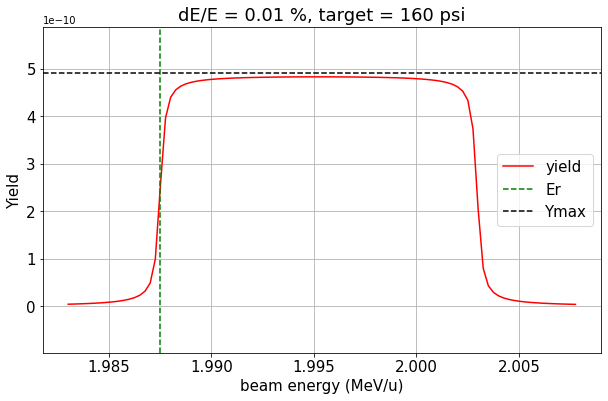

In [26]:
E_lab_per_u = []
for i in Ein_lab_list:
    E_lab_per_u.append(i/proj_A)

plt.figure(figsize=(10, 6))

plt.plot(E_lab_per_u, th_yield, linestyle='-', c='r', alpha=1.0, label='yield')

plt.axvline(E_proj_lab/proj_A, linestyle='--', c='g', label='Er')
plt.axhline(Ymax, c='k', linestyle='--', label='Ymax')

fontSize=15

plt.xlabel('beam energy (MeV/u)',fontsize=fontSize)
plt.xticks(fontsize=fontSize)
plt.ylabel('Yield',fontsize=fontSize)
plt.yticks(fontsize=fontSize)
plt_title = 'dE/E = {:.2f} %, target = {:.0f} psi'.format(beam_E_delta, tar_den_psi)
plt.title(plt_title,fontsize=18)
plt.ylim(-Ymax*0.2, 1.2*Ymax)
plt.legend(fontsize=15)
plt.grid()

plt.show()